<a href="https://colab.research.google.com/github/enps2015/TelosSimuladorNivel1/blob/main/SimuladorNivel01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simulador Télos - Nível 1 trilha de Dados**

## **Análise de vendas de Carro no Nordeste do Brasil**

## **Contextualizando:**

Você aprendeu que o trabalho de um profissional de dados é gerar insights que
apoiem as tomadas de decisão estratégicas de uma empresa. Agora, você
poderá fazer isso na prática, ajudando uma rede de concessionárias a gerar um
relatório detalhado sobre suas lojas no nordeste, respondendo a algumas
perguntas e pedidos:
- Qual é a loja com a maior média de vendas em 2023?
- Represente o ranking da média de vendas das lojas com um gráfico de
barras.
- De acordo com a pesquisa de mercado feita, quais lojas são conhecidas
em sua cidade e quais não são? (para que uma loja seja considerada
conhecida, a maior parte das pessoas na pesquisa deve dizer que
conhece a loja, ou seja, a resposta afirmativa deve ser a moda).
- Quais lojas estão no quartil que tem as piores médias de vendas de
2023?
- Quais lojas do pior quartil é a mais inconstante em suas vendas?
- De acordo com os dados temporais apresentados, como serão as
vendas dos próximos 3 anos para a região nordeste da empresa?
- Utilize dados de lojas do resto do Brasil para treinar um modelo de
regressão linear e então utilize-o para tentar prever a probabilidade de
um cliente voltar a fazer negócio com as lojas do nordeste de acordo com
o seu nível de satisfação

## **Importação e preparação dos Dados**

## **1- Importando as bibliotecas**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **2- Carregando a Base de Dados (do Google Drive)**

In [2]:
# Base de Dados usando planilhas Excel

vendas_2023 = pd.read_excel("/content/drive/My Drive/Telos/TrilhaDados/SimuladorNivel1/Vendas_de_2023.xlsx")
total_vendas = pd.read_excel("/content/drive/My Drive/Telos/TrilhaDados/SimuladorNivel1/Total_de_Vendas.xlsx")
pesquisa_populacao = pd.read_excel("/content/drive/My Drive/Telos/TrilhaDados/SimuladorNivel1/Pesquisa_Populacao_Geral.xlsx")
satisfacao_clientes = pd.read_excel("/content/drive/My Drive/Telos/TrilhaDados/SimuladorNivel1/Satisfacao_dos_Clientes.xlsx")

## **3- Limpeza e Transformação dos Dados**

In [3]:
# Consultando informações dos Data Frames usando o comando info()

print(f"{vendas_2023.info()}\n")
print(f"{total_vendas.info()}\n")
print(f"{pesquisa_populacao.info()}\n")
print(f"{satisfacao_clientes.info()}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Cidade      9 non-null      object
 1   31/01/2023  9 non-null      int64 
 2   28/02/2023  9 non-null      int64 
 3   31/03/2023  9 non-null      int64 
 4   30/04/2023  9 non-null      int64 
 5   31/05/2023  9 non-null      int64 
 6   30/06/2023  9 non-null      int64 
 7   31/07/2023  9 non-null      int64 
 8   31/08/2023  9 non-null      int64 
 9   30/09/2023  9 non-null      int64 
 10  31/10/2023  9 non-null      int64 
 11  30/11/2023  9 non-null      int64 
 12  31/12/2023  9 non-null      int64 
dtypes: int64(12), object(1)
memory usage: 1.0+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ano              21 non-null     int64  
 1

## **4- Respondendo às Perguntas de Negócios**

**1- Qual é a loja com maior Média de vendas em 2023?**

In [5]:
print(vendas_2023)

        Cidade  31/01/2023  28/02/2023  31/03/2023  30/04/2023  31/05/2023  \
0    Fortaleza    13429000    15069700    10240000     9546000    16879400   
1       Recife     9024300    10165210     8023740     9508230     7426190   
2        Natal     9014100     6027310     7184090     8715240     4839170   
3  João Pessoa     5101000     5478210     6674930     4162850     7281490   
4     São Luis     6811110     8394720     6142890     7531060     5128930   
5     Teresina    10359840     9582370    10764820     8325940     7123910   
6      Aracaju     7813200    10542870     9456130     8769420    11295760   
7       Maceió     3211000     8974260    11435090     7628350    10657230   
8     Salvador     8450000     9562180    10873920     7415060     8254790   

   30/06/2023  31/07/2023  31/08/2023  30/09/2023  31/10/2023  30/11/2023  \
0    19880000     8456200    12300000    10002450     9546000    12010350   
1    11234560     6758920     8173210     9876540     7289010    

In [18]:
# Calculando a Média de vendas por cidade

# Removendo a Coluna Cidade do Data Frame vendas_2023 e renomeando como vendas_anual
vendas_anual = vendas_2023.drop(columns=['Cidade'])

# Calculando a Média dos valores e colocando na Coluna Média_Vendas
vendas_2023['Média_Vendas'] = vendas_anual.mean(axis=1)

# Ordenanando as cidades pela média de vendas em ordem decrescente
vendas_2023.sort_values('Média_Vendas', ascending=False, inplace=True)

print(vendas_2023)

        Cidade  31/01/2023  28/02/2023  31/03/2023  30/04/2023  31/05/2023  \
0    Fortaleza    13429000    15069700    10240000     9546000    16879400   
5     Teresina    10359840     9582370    10764820     8325940     7123910   
6      Aracaju     7813200    10542870     9456130     8769420    11295760   
8     Salvador     8450000     9562180    10873920     7415060     8254790   
7       Maceió     3211000     8974260    11435090     7628350    10657230   
1       Recife     9024300    10165210     8023740     9508230     7426190   
2        Natal     9014100     6027310     7184090     8715240     4839170   
4     São Luis     6811110     8394720     6142890     7531060     5128930   
3  João Pessoa     5101000     5478210     6674930     4162850     7281490   

   30/06/2023  31/07/2023  31/08/2023  30/09/2023  31/10/2023  30/11/2023  \
0    19880000     8456200    12300000    10002450     9546000    12010350   
5    10157230     7694250     9246810    11883050     8375620    

In [19]:
# Exibindo a Cidade com maior Média de vendas
print(f"A loja com maior média de vendas é: {vendas_2023.iloc[0]['Cidade']}")

A loja com maior média de vendas é: Fortaleza


## **4- Respondendo às Perguntas de Negócios**

**2- Ranking da média de vendas das lojas**

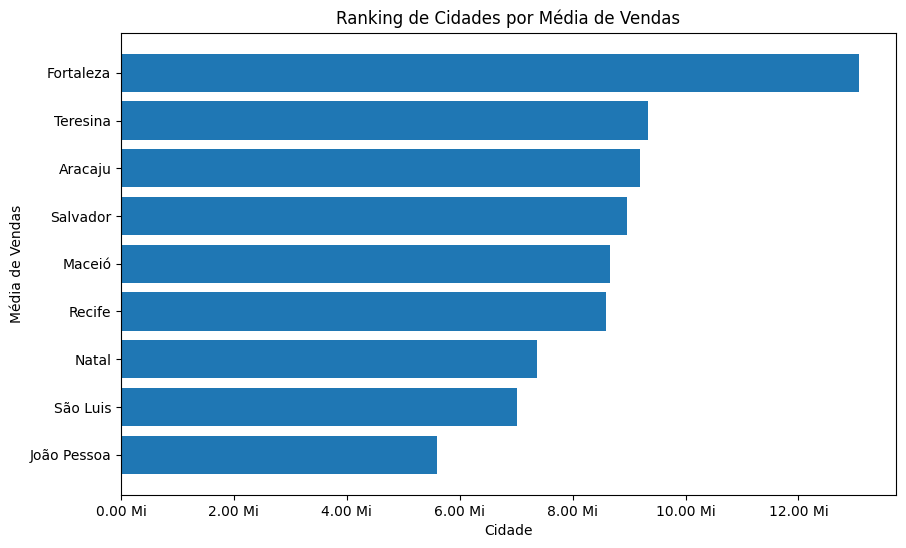

In [21]:
# Criando gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(vendas_2023['Cidade'], vendas_2023['Média_Vendas'])

plt.xlabel('Cidade')
plt.ylabel('Média de Vendas')
plt.title('Ranking de Cidades por Média de Vendas')

# Formatando o eixo X com 2 casas decimais e "Mi" (milhões)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.2f} Mi'))

# ordenando o gráfico
plt.gca().invert_yaxis()
plt.show()

## **4- Respondendo às Perguntas de Negócios**

**3- Lojas conhecidas em cada Cidade?**

In [22]:
# Calculando a moda usando um agrupamento das Colunas 'Cidade' e 'Conhece a conssessionaria?'
moda_por_cidade = pesquisa_populacao.groupby('Cidade')['Conhece a conssessionária?'].agg(pd.Series.mode)

# Exibindo os resultados
print(moda_por_cidade)

Cidade
Aracaju        Não
Fortaleza      Sim
João Pessoa    Não
Maceió         Não
Natal          Não
Recife         Não
Salvador       Não
São Luis       Não
Teresina       Não
Name: Conhece a conssessionária?, dtype: object


## **4- Respondendo às Perguntas de Negócios**

**4- Lojas do quartil com as piores médias de vendas?**

In [24]:
# Calculando o quartil inferior (25%) da média de vendas
quartis = vendas_2023['Média_Vendas'].quantile([0.25, 0.5, 0.75])
quartil_inferior = vendas_2023['Média_Vendas'].quantile(0.25)
print(f"O valor do quartil inferior é: {quartil_inferior}")

# Filtrando as cidades com médias de vendas inferiores ao quartil inferior
lojas_pior_quartil = vendas_2023[vendas_2023['Média_Vendas'] <= quartil_inferior]

# Exibindo as cidades com médias de vendas inferiores ao quartil inferior
print("Lojas com médias de vendas inferiores ao quartil inferior:")
print(lojas_pior_quartil)

O valor do quartil inferior é: 7377102.5
Lojas com médias de vendas inferiores ao quartil inferior:
        Cidade  31/01/2023  28/02/2023  31/03/2023  30/04/2023  31/05/2023  \
2        Natal     9014100     6027310     7184090     8715240     4839170   
4     São Luis     6811110     8394720     6142890     7531060     5128930   
3  João Pessoa     5101000     5478210     6674930     4162850     7281490   

   30/06/2023  31/07/2023  31/08/2023  30/09/2023  31/10/2023  30/11/2023  \
2     5392860     7251830     6182750     8329560     7673400     9800200   
4     9273810     6785240     5462190     7365980     8713050     5927130   
3     3826170     6937520     5593280     4759160     6334710     7148250   

   31/12/2023  Média_Vendas  
2     8114720  7.377102e+06  
4     6598240  7.011196e+06  
3     3872150  5.597477e+06  


## **4- Respondendo às Perguntas de Negócios**

**5- Quais lojas do pior quartil é mais inconstante em suas vendas?**

In [25]:
vendas_2023

,Cidade,31/01/2023,28/02/2023,31/03/2023,30/04/2023,31/05/2023,30/06/2023,31/07/2023,31/08/2023,30/09/2023,31/10/2023,30/11/2023,31/12/2023,Média_Vendas
0,Fortaleza,13429000,15069700,10240000,9546000,16879400,19880000,8456200,12300000,10002450,9546000,12010350,19546000,1.307542e+07
5,Teresina,10359840,9582370,10764820,8325940,7123910,10157230,7694250,9246810,11883050,8375620,11029340,7438190,9.331781e+06
6,Aracaju,7813200,10542870,9456130,8769420,11295760,7023410,11768940,7894520,8195630,10314780,7362910,9821540,9.188259e+06
8,Salvador,8450000,9562180,10873920,7415060,8254790,11367250,7028930,9786340,8142970,10523810,7295640,8914730,8.967968e+06
7,Maceió,3211000,8974260,11435090,7628350,10657230,7189240,9246810,10283570,7862150,8934010,11092870,7425690,8.661689e+06
1,Recife,9024300,10165210,8023740,9508230,7426190,11234560,6758920,8173210,9876540,7289010,8457230,7132450,8.589132e+06
2,Natal,9014100,6027310,7184090,8715240,4839170,5392860,7251830,6182750,8329560,7673400,9800200,8114720,7.377102e+06
4,São Luis,6811110,8394720,6142890,7531060,5128930,9273810,6785240,5462190,7365980,8713050,5927130,6598240,7.011196e+06
3,João Pessoa,5101000,5478210,6674930,4162850,7281490,3826170,6937520,5593280,4759160,6334710,7148250,3872150,5.597477e+06


In [38]:
# Seleciona as colunas de vendas (meses)
colunas_vendas = vendas_2023.columns[1:]  # Exclui a primeira coluna, que é "Cidade"

# Calcula o desvio padrão das vendas de 2023 para cada loja do pior quartil
desvio_padrao_vendas_2023 = vendas_2023.loc[lojas_pior_quartil.index, colunas_vendas].std(axis=1)

# Encontra a loja com o maior desvio padrão em 2023
loja_mais_inconstante = desvio_padrao_vendas_2023.idxmax()

# Exibe a cidade da loja mais inconstante
cidade_mais_inconstante = vendas_2023.loc[loja_mais_inconstante, 'Cidade']
print(f"A cidade da loja mais inconstante no pior quartil de 2023 é: {cidade_mais_inconstante}")


A cidade da loja mais inconstante no pior quartil de 2023 é: Natal


## **4- Respondendo às Perguntas de Negócios**

**6- De acordo com os dados temporais apresentados, como serão as
vendas dos próximos 3 anos para a região nordeste da empresa?**

In [44]:
# Calcular a média móvel de 3 anos (ajuste o período se necessário)
total_vendas['Média Móvel'] = total_vendas['Total de Vendas'].rolling(window=3).mean()

print(total_vendas)

     Ano  Total de Vendas   Média Móvel
0   2004     8.416882e+08           NaN
1   2005     8.466351e+08           NaN
2   2006     8.515821e+08  8.466351e+08
3   2007     8.565290e+08  8.515821e+08
4   2008     8.614759e+08  8.565290e+08
5   2009     8.664229e+08  8.614759e+08
6   2010     8.713698e+08  8.664229e+08
7   2011     8.763167e+08  8.713698e+08
8   2012     8.812637e+08  8.763167e+08
9   2013     8.862106e+08  8.812637e+08
10  2014     8.800010e+08  8.824918e+08
11  2015     8.998989e+08  8.887035e+08
12  2016     9.040030e+08  8.946343e+08
13  2017     9.064510e+08  9.034510e+08
14  2018     9.134520e+08  9.079687e+08
15  2019     9.187974e+08  9.129001e+08
16  2020     9.241428e+08  9.187974e+08
17  2021     9.294882e+08  9.241428e+08
18  2022     9.301460e+08  9.279257e+08
19  2023     9.336004e+08  9.310782e+08
20  2024     9.348336e+08  9.328600e+08


In [45]:
# Extrapolação linear

# Calculando a previsão para o Próxima Ano
previsao_proximo_ano = total_vendas['Média Móvel'].iloc[-1] + (total_vendas['Média Móvel'].iloc[-1] - total_vendas['Média Móvel'].iloc[-2])
print(f"Previsão para o próximo ano: {previsao_proximo_ano}")

Previsão para o próximo ano: 934641777.9999998


In [46]:
# Calculando a previsão para o Segundo Ano
previsao_segundo_ano = previsao_proximo_ano + (previsao_proximo_ano - total_vendas['Média Móvel'].iloc[-1])
print(f"Previsão para o segundo ano: {previsao_segundo_ano}")

Previsão para o segundo ano: 936423577.7999996


In [47]:
# Calculando a previsão para o Terceiro Ano
previsao_terceira_ano = previsao_segundo_ano + (previsao_segundo_ano - previsao_proximo_ano)
print(f"Previsão para o terceiro ano: {previsao_terceira_ano}")

Previsão para o terceiro ano: 938205377.5999994


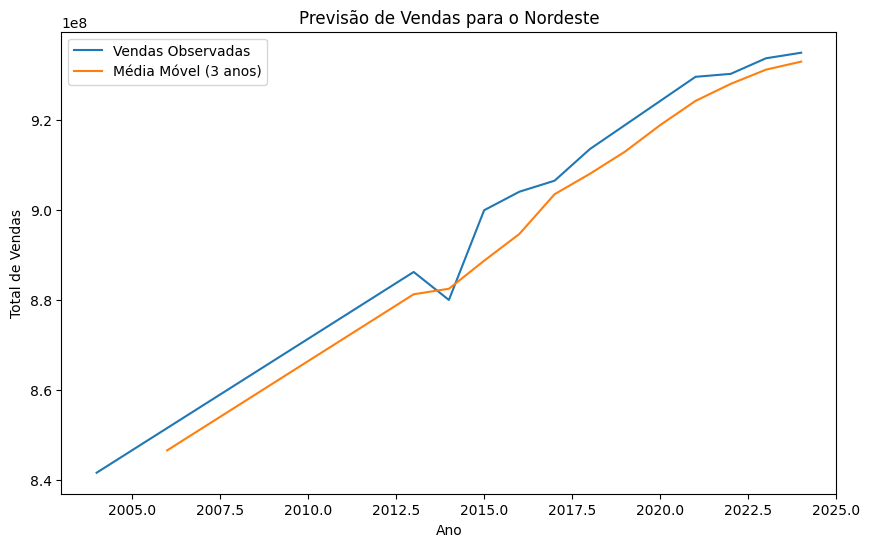

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(total_vendas['Ano'], total_vendas['Total de Vendas'], label='Vendas Observadas')
plt.plot(total_vendas['Ano'], total_vendas['Média Móvel'], label='Média Móvel (3 anos)')
plt.xlabel('Ano')
plt.ylabel('Total de Vendas')
plt.title('Previsão de Vendas para o Nordeste')
plt.legend()
plt.show()

## **4- Respondendo às Perguntas de Negócios**

**7- Utilize dados de lojas do resto do Brasil para treinar um modelo de
regressão linear e então utilize-o para tentar prever a probabilidade de
um cliente voltar a fazer negócio com as lojas do nordeste de acordo com
o seu nível de satisfação**